# 8. Морфологические преобразования

In [60]:
import cv2
import numpy as np
import random
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

In [61]:
# функция ввода изображения
def img_input(img_path, size=(0, 0), type=1):
    img = cv2.imread(img_path, type)
    if type == 1:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if size != (0, 0):
            img = cv2.resize(img, size)
            return img
        else:
            return img
    else:
        if size != (0, 0):
            img = cv2.resize(img, size)
            return img
        else:
            return img


# функция вывода изображения
def img_print(images, titles, row_and_colm=(0, 0), hard_type='None'):
    num_of_img = len(images)
    if hard_type == 'None':
        for i in range(num_of_img):
            if row_and_colm == (0, 0):
                plt.subplot(1, num_of_img, i + 1), plt.imshow(images[i])
                plt.title(titles[i])
                plt.xticks([]), plt.yticks([])
            else:
                plt.subplot(row_and_colm[0], row_and_colm[1], i + 1), plt.imshow(images[i])
                plt.title(titles[i])
                plt.xticks([]), plt.yticks([])
        plt.show()

    else:
        for i in range(num_of_img):
            if row_and_colm == (0, 0):
                plt.subplot(1, num_of_img, i + 1), plt.imshow(images[i], hard_type)
                plt.title(titles[i])
                plt.xticks([]), plt.yticks([])
            else:
                plt.subplot(row_and_colm[0], row_and_colm[1], i + 1), plt.imshow(images[i], hard_type)
                plt.title(titles[i])
                plt.xticks([]), plt.yticks([])
        plt.show()

## 8.1. Дилатация (расширение) и 8.2. Эрозия

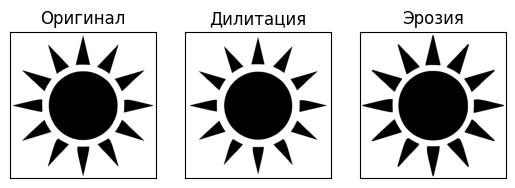

In [62]:
image = img_input('img/sun.png', type=0)

# Создадим ядро 5x5
kernel = np.ones((5, 5), np.uint8)

# Выполним функции  дилатации и эрозии
dilation = cv2.dilate(image, kernel, iterations=2)
erosion = cv2.erode(image, kernel, iterations=2)

res = [image, dilation, erosion]
title = ['Оригинал', 'Дилитация', 'Эрозия']

img_print(res, title, hard_type='gray')

## 8.3. Открытие, размыкание и 8.4. Закрытие, замыкание

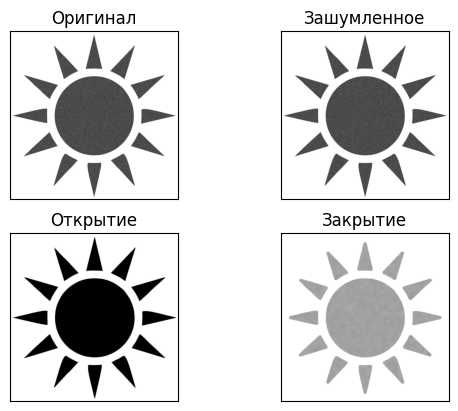

In [63]:
image = Image.open('img/sun.jpg')
draw = ImageDraw.Draw(image)
width = image.size[0]
height = image.size[1]
pix = image.load()
for i in range(width):
    for j in range(height):
        rand = random.randint(0, 150)
        a = pix[i, j][0] + rand
        b = pix[i, j][1] + rand
        c = pix[i, j][2] + rand
        if (a > 255):
            a = 255
        if (b > 255):
            b = 255
        if (c > 255):
            c = 255
        draw.point((i, j), (a, b, c))

image.save("img/median.png", "JPEG")

noise = cv2.imread("img/median.png", 1)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30, 30))

opening = cv2.morphologyEx(noise, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(noise, cv2.MORPH_CLOSE, kernel)

res = [image, noise, opening, closing]
title = ['Оригинал', 'Зашумленное', 'Открытие', 'Закрытие']

img_print(res, title, row_and_colm=(2, 2))

## 8.5. Морфологический градиент

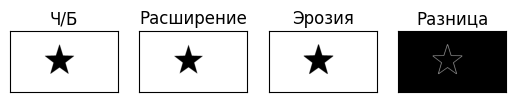

In [64]:
gray_img = img_input('img/star.jpg', type=0)
copy_image = gray_img.copy()
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Операция расширения
dilated_image = cv2.dilate(gray_img, kernel)

# Операция эрозии
eroded_image = cv2.erode(copy_image, kernel)

# Вычитание изображения после эрозии из расширенного изображения
result = dilated_image - eroded_image

res = [gray_img, dilated_image, eroded_image, result]
title = ['Ч/Б', 'Расширение', 'Эрозия', 'Разница']

img_print(res, title, hard_type='gray')

## 8.6. Цилиндр

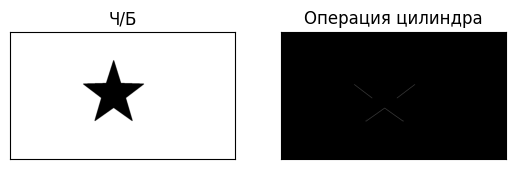

In [65]:
image = img_input('img/star.jpg', type=0)

# Применим операцию цилиндра
result = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, (48, 48))

res = [image, result]
title = ['Ч/Б', 'Операция цилиндра']

img_print(res, title, hard_type='gray')

## 8.7. Черная шляпа

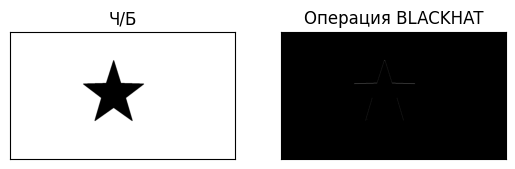

In [66]:
image = img_input('img/star.jpg', type=0)

result = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, (48, 48))

res = [image, result]
title = ['Ч/Б', 'Операция BLACKHAT']

img_print(res, title, hard_type='gray')

## 8.8. Обработка изображения с помощью структурирующего элемента (ядра)


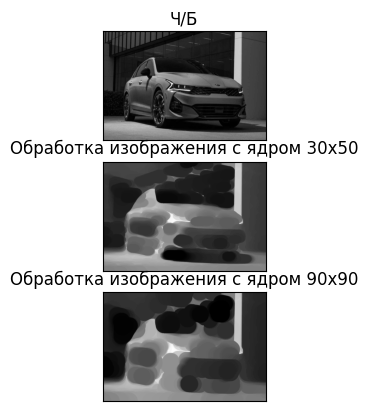

In [67]:
image = img_input('img/car.jpg', type=0, size=(900,600))

# Ядра
kernel_1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(70,50))
kernel_2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(90,90))

# Обработка
result_1 = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel_1)
result_2 = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel_2)

res = [image, result_1, result_2]
title = ['Ч/Б','Обработка изображения с ядром 30x50','Обработка изображения с ядром 90x90']

img_print(res, title, row_and_colm=(3,1), hard_type='gray')